In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import plotly.express as px
import matplotlib.dates as mdates

In [38]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [39]:
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

In [87]:
df1.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,59745,59939,60122,60300,60563,60797,61162,61455,61755,61842
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,131085,131185,131238,131276,131327,131419,131510,131577,131666,131723
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,122108,122311,122522,122717,122999,123272,123473,123692,123900,124104
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,13232,13232,13282,13295,13316,13340,13363,13390,13406,13423
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,26652,26815,26993,27133,27284,27529,27921,28201,28477,28740


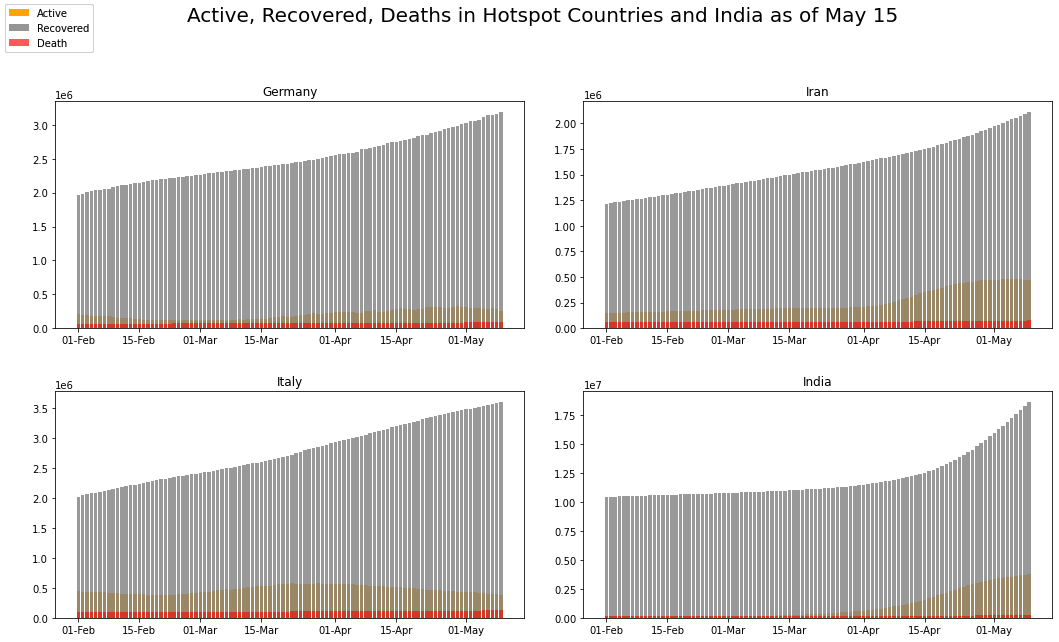

In [40]:
hotspots = ['Germany','Iran','Italy','India']
dates = list(confirmed_df.columns[380:])
dates = list(pd.to_datetime(dates))
dates_india = dates

df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

global_confirmed = {}
global_deaths = {}
global_recovered = {}
global_active= {}

for country in hotspots:
    k =df1[df1['Country/Region'] == country].loc[:,'2/1/21':]
    global_confirmed[country] = k.values.tolist()[0]

    k =df2[df2['Country/Region'] == country].loc[:,'2/1/21':]
    global_deaths[country] = k.values.tolist()[0]

    k =df3[df3['Country/Region'] == country].loc[:,'2/1/21':]
    global_recovered[country] = k.values.tolist()[0]
    
for country in hotspots:
    k = list(map(int.__sub__, global_confirmed[country], global_deaths[country]))
    global_active[country] = list(map(int.__sub__, k, global_recovered[country]))
    
fig = plt.figure(figsize= (15,25))
plt.suptitle('Active, Recovered, Deaths in Hotspot Countries and India as of May 15',fontsize = 20,y=1.0)
#plt.legend()
k=0
for i in range(1,5):
    ax = fig.add_subplot(6,2,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.bar(dates_india,global_active[hotspots[k]],color = 'orange', label = 'Active');
    ax.bar(dates_india,global_recovered[hotspots[k]],color='grey',alpha=0.8,label = 'Recovered');
    ax.bar(dates_india,global_deaths[hotspots[k]],color='red',alpha=0.6,label = 'Death');   
    plt.title(hotspots[k])
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1

plt.tight_layout(pad=3.0)

In [41]:
df1.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,59745,59939,60122,60300,60563,60797,61162,61455,61755,61842
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,131085,131185,131238,131276,131327,131419,131510,131577,131666,131723
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,122108,122311,122522,122717,122999,123272,123473,123692,123900,124104
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,13232,13232,13282,13295,13316,13340,13363,13390,13406,13423
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,26652,26815,26993,27133,27284,27529,27921,28201,28477,28740


### Deaths in the last 3 months

In [42]:
k = df1[df1['Country/Region']=='India'].loc[:,'2/1/21':]
india_confirmed = k.values.tolist()[0] 

k = df2[df2['Country/Region']=='India'].loc[:,'2/1/21':]
india_deaths = k.values.tolist()[0] 

k = df3[df3['Country/Region']=='India'].loc[:,'2/1/21':]
india_recovered = k.values.tolist()[0] 


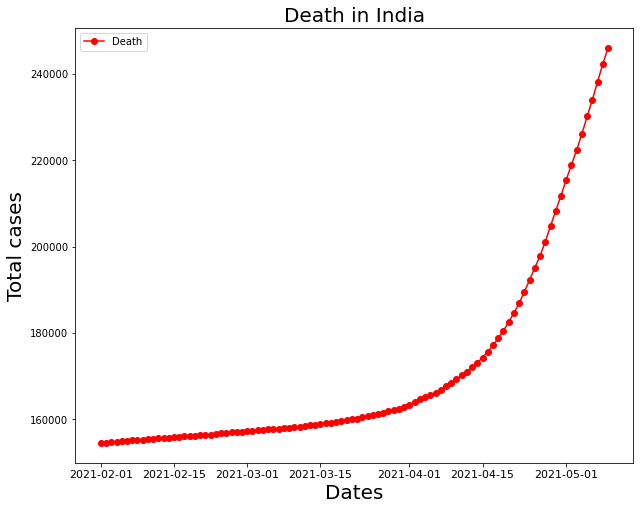

In [43]:
plt.figure(figsize= (10,8))
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Death in India" , fontsize = 20)

#ax1 = plt.plot_date(y= india_confirmed,x= dates_india,label = 'Confirmed',linestyle ='-',color = 'b')
#ax2 = plt.plot_date(y= india_recovered,x= dates_india,label = 'Recovered',linestyle ='-',color = 'g')
ax3 = plt.plot_date(y= india_deaths,x= dates_india,label = 'Death',linestyle ='-',color = 'r')
plt.legend();

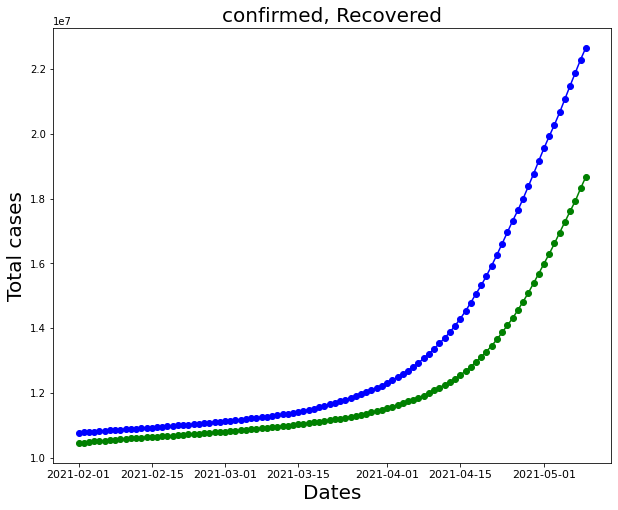

In [44]:
plt.figure(figsize= (10,8))
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("confirmed, Recovered" , fontsize = 20)

ax1 = plt.plot_date(y= india_confirmed,x= dates_india,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= india_recovered,x= dates_india,label = 'Recovered',linestyle ='-',color = 'g')

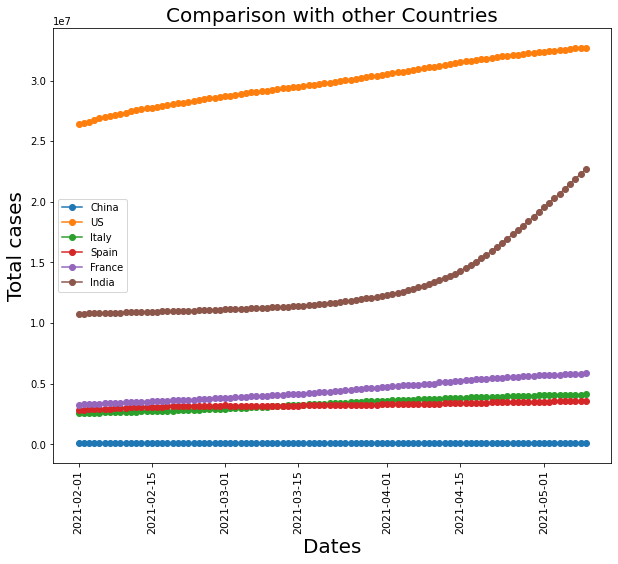

In [45]:
countries = ['China','US', 'Italy', 'Spain', 'France','India']

global_confirmed = []
global_recovered = []
global_deaths = []
global_active = []

for country in countries:
    k =df1[df1['Country/Region'] == country].loc[:,'2/1/21':]
    global_confirmed.append(k.values.tolist()[0]) 

    k =df2[df2['Country/Region'] == country].loc[:,'2/1/21':]
    global_deaths.append(k.values.tolist()[0]) 


plt.figure(figsize= (10,8))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Comparison with other Countries" , fontsize = 20)

for i in range(len(countries)):
    plt.plot_date(y= global_confirmed[i],x= dates_india,label = countries[i],linestyle ='-')
plt.legend();

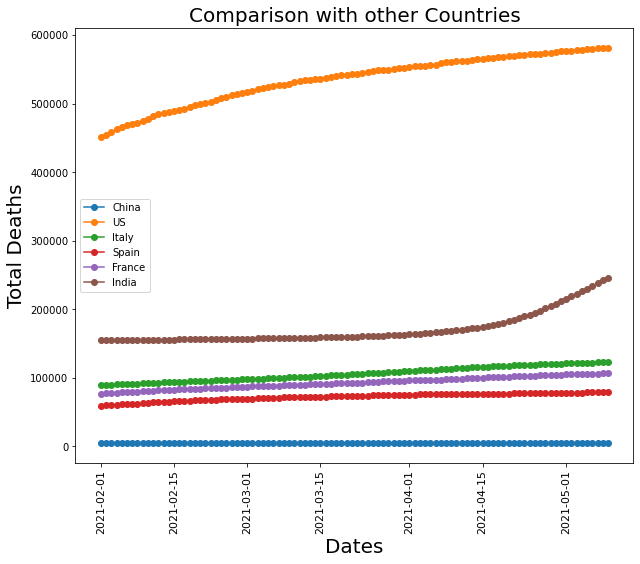

In [46]:
plt.figure(figsize= (10,8))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total Deaths',fontsize = 20)
plt.title("Comparison with other Countries" , fontsize = 20)

for i in range(len(countries)):
    plt.plot_date(y= global_deaths[i],x= dates_india,label = countries[i],linestyle ='-')
plt.legend();

### State-wise analysis

In [47]:
india_covid_19=pd.read_csv('covid_19_india.csv')

In [48]:
india_covid_19.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [49]:
state_cases = india_covid_19.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()

<ipython-input-49-fb89aa5ac0ba>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [50]:
state_cases.head()

,State/UnionTerritory,Confirmed,Deaths,Cured
0,Andaman and Nicobar Islands,6311,72,6030
1,Andhra Pradesh,1245374,8519,1050160
2,Arunachal Pradesh,19802,60,17849
3,Assam,283313,1578,246242
4,Bihar,567269,3139,449063


In [51]:
state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Deaths']+state_cases['Cured'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Blues',subset=["Deaths"])\
                        .background_gradient(cmap='Blues',subset=["Cured"])\
                        .background_gradient(cmap='Blues',subset=["Active"])\
                        .background_gradient(cmap='Blues',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Blues',subset=["Cure Rate (per 100)"])

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
22,Maharashtra,4996758,74413,4265326,657019,1.490000,85.360000
17,Karnataka,1838885,17804,1284420,536661,0.970000,69.850000
18,Kerala,1824856,5682,1416177,402997,0.310000,77.600000
37,Uttar Pradesh,1453679,14873,1184688,254118,1.020000,81.500000
32,Tamil Nadu,1323965,15171,1173439,135355,1.150000,88.630000
10,Delhi,1292867,18739,1183093,91035,1.450000,91.510000
1,Andhra Pradesh,1245374,8519,1050160,186695,0.680000,84.320000
39,West Bengal,954282,12076,818108,124098,1.270000,85.730000
7,Chhattisgarh,830117,10158,688918,131041,1.220000,82.990000
30,Rajasthan,720799,5346,516306,199147,0.740000,71.630000


### State-wise spread over time

In [52]:
formated_india = india_covid_19.groupby(['Date', 'State/UnionTerritory'])['Confirmed'].max()
formated_india

Date        State/UnionTerritory
2020-01-30  Kerala                        1
2020-01-31  Kerala                        1
2020-02-01  Kerala                        2
2020-02-02  Kerala                        3
2020-02-03  Kerala                        3
                                     ...   
2021-05-08  Telangana                487199
            Tripura                   37208
            Uttar Pradesh           1453679
            Uttarakhand              229993
            West Bengal              954282
Name: Confirmed, Length: 14690, dtype: int64

In [53]:
formated_india=formated_india.reset_index()

In [54]:
formated_india['Date'] = pd.to_datetime(formated_india['Date'])
formated_india['Date'] = formated_india['Date'].dt.strftime('%m/%d/%Y')
formated_india['size'] = formated_india['Confirmed'].pow(0.9)

In [55]:
formated_india_new=formated_india.iloc[11198:,:]
formated_india_new

,Date,State/UnionTerritory,Confirmed,size
11198,02/01/2021,Andaman and Nicobar Islands,4994,2131.099289
11199,02/01/2021,Andhra Pradesh,887836,225683.327120
11200,02/01/2021,Arunachal Pradesh,16828,6359.591980
11201,02/01/2021,Assam,217141,63542.990527
11202,02/01/2021,Bihar,259563,74613.687956
...,...,...,...,...
14685,05/08/2021,Telangana,487199,131503.026895
14686,05/08/2021,Tripura,37208,12988.909589
14687,05/08/2021,Uttar Pradesh,1453679,351739.923631
14688,05/08/2021,Uttarakhand,229993,66918.031396


In [80]:
import plotly

In [81]:
fig = px.scatter_geo(formated_india_new, locations="State/UnionTerritory", geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson", 
                     featureidkey='properties.ST_NM',color="Confirmed", size='size', hover_name="State/UnionTerritory", 
                     range_color= [0, 5000000], 
                     projection="natural earth", animation_frame="Date", 
                     title='COVID-19: Spread Over Time india', color_continuous_scale="portland")

plotly.offline.iplot(fig)

## Modelling

In [86]:
india_covid_19.tail()


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
14685,14686,2021-05-08,8:00 AM,Telangana,-,-,413225,2666,487199
14686,14687,2021-05-08,8:00 AM,Tripura,-,-,34270,405,37208
14687,14688,2021-05-08,8:00 AM,Uttarakhand,-,-,158872,3430,229993
14688,14689,2021-05-08,8:00 AM,Uttar Pradesh,-,-,1184688,14873,1453679
14689,14690,2021-05-08,8:00 AM,West Bengal,-,-,818108,12076,954282


In [83]:
states=state_cases['State/UnionTerritory']
states

20                                 Maharashtra
15                                   Karnataka
16                                      Kerala
34                               Uttar Pradesh
30                                  Tamil Nadu
8                                        Delhi
1                               Andhra Pradesh
36                                 West Bengal
6                                 Chhattisgarh
28                                   Rajasthan
10                                     Gujarat
19                              Madhya Pradesh
11                                     Haryana
4                                        Bihar
25                                      Odisha
31                                   Telangana
32                                   Telengana
27                                      Punjab
3                                        Assam
14                                   Jharkhand
35                                 Uttarakhand
13           

In [60]:
all_state = list(india_covid_19['State/UnionTerritory'].unique())
all_state.remove('Unassigned')
latest = india_covid_19[india_covid_19['Date'] > '2021-02-01']
state_cases = latest.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
latest['Active'] = latest['Confirmed'] - (latest['Deaths']- latest['Cured'])
#state_cases = state_cases.sort_values('Confirmed', ascending= False).fillna(0)

<ipython-input-60-016c0517811d>:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-60-016c0517811d>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
state_cases = state_cases.sort_values('Confirmed', ascending= False).fillna(0) 
#top 15 states 
states =list(state_cases['State/UnionTerritory'][0:15])
states

['Maharashtra',
 'Karnataka',
 'Kerala',
 'Uttar Pradesh',
 'Tamil Nadu',
 'Delhi',
 'Andhra Pradesh',
 'West Bengal',
 'Chhattisgarh',
 'Rajasthan',
 'Gujarat',
 'Madhya Pradesh',
 'Haryana',
 'Bihar',
 'Odisha']

In [62]:
states_confirmed = {}
states_deaths = {}
states_recovered = {}
states_active = {}
states_dates = {}

for state in states:
    df = latest[latest['State/UnionTerritory'] == state].reset_index()
    k = []
    l = []
    m = []
    n = []
    for i in range(1,len(df)):
        k.append(df['Confirmed'][i]-df['Confirmed'][i-1])
        l.append(df['Deaths'][i]-df['Deaths'][i-1])
        m.append(df['Cured'][i]-df['Cured'][i-1])
        n.append(df['Active'][i]-df['Active'][i-1])
    # daily numbers 
    states_confirmed[state] = k
    states_deaths[state] = l
    states_recovered[state] = m
    states_active[state] = n
    date = list(df['Date'])
    states_dates[state] = date[1:]

In [63]:
def calc_movingaverage(values ,N):    
    cumsum, moving_aves = [0], [0,0]
    for i, x in enumerate(values, 1):
        cumsum.append(cumsum[i-1] + x)
        if i>=N:
            moving_ave = (cumsum[i] - cumsum[i-N])/N
            moving_aves.append(moving_ave)
    return moving_aves

In [64]:
moving_aves = calc_movingaverage(states_confirmed['Maharashtra'],5)
len(moving_aves)

93

In [65]:
states_confirmed['Maharashtra'][0:10]

[1927, 2992, 2736, 2628, 2768, 2673, 2216, 2515, 3451, 652]

In [66]:
moving_aves[0:5]

[0, 0, 2610.2, 2759.4, 2604.2]

In [67]:
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = states_dates['Maharashtra'][:-2]
data['y'] = moving_aves

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


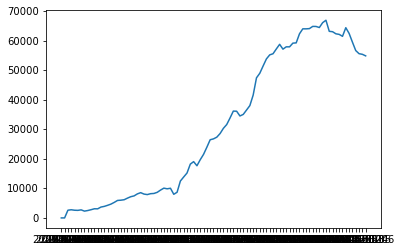

In [68]:
plt.plot(data['ds'],data['y'])

In [69]:
from prophet import Prophet
from prophet.plot import plot_plotly, add_changepoints_to_plot

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


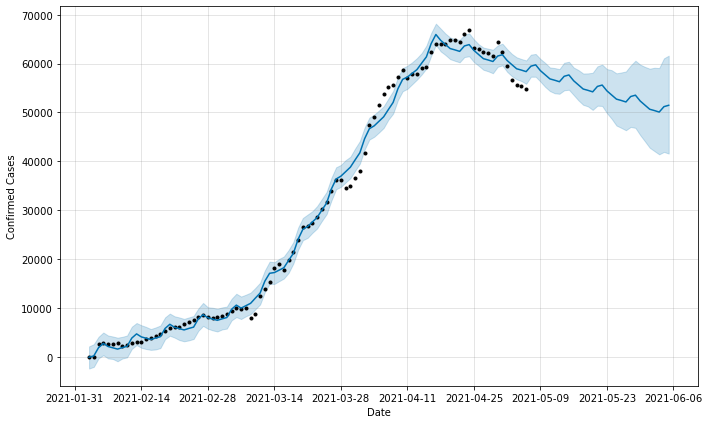

In [70]:
prop=Prophet()
prop.fit(data)
future=prop.make_future_dataframe(periods=30)
prop_forecast=prop.predict(future)
forecast = prop_forecast[['ds','yhat']].tail(30)

fig = plot_plotly(prop, prop_forecast)
fig = prop.plot(prop_forecast,xlabel='Date',ylabel='Confirmed Cases')

In [79]:
from statsmodels.tsa.arima.model import ARIMA
import datetime
arima = ARIMA(data['y'], order=(20, 2, 0))
arima = arima.fit()
forecast = arima.forecast(steps= 30)
# pred = list(forecast[])

start_date = data['ds'].max()
prediction_dates = []
for i in range(30):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Predicted Values for the next 15 Days" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = '#ff9999',label = 'Predicted');
plt.plot_date(y=data['y'],x=data['ds'],linestyle = '-',color = 'blue',label = 'Actual');
plt.legend();

TypeError: can only concatenate str (not "datetime.timedelta") to str

In [72]:
start_date = data['ds'].max()
start_date

'2021-05-06'